# Feature Engineering

Create new features: Debt-to-Income ratio, Loan-to-Income ratio. (Credit history length not possible due to lack of data.)

In [2]:
import sys
import os

# go one level up (from Notebook/ to project root)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))


import pandas as pd
import numpy as np
from src.config import PROCESSED_DATA_PATH
from src.utils import log_info

# Load cleaned data
data = pd.read_csv(PROCESSED_DATA_PATH)
log_info(f'Loaded cleaned data with shape: {data.shape}')

2025-09-11 10:14:45,674 - INFO - Loaded cleaned data with shape: (614, 12)


In [3]:
# Create new features
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['DTI'] = data['LoanAmount'] / data['TotalIncome']  # Debt-to-Income
data['Loan_to_Income'] = data['LoanAmount'] / data['ApplicantIncome']  # Loan-to-Income
data['LoanAmount_Log'] = np.log(data['LoanAmount'] + 1)  # Log transform
log_info('New features added: TotalIncome, DTI, Loan_to_Income, LoanAmount_Log')

# Save engineered data
engineered_data_path = PROCESSED_DATA_PATH.replace('.csv', '_engineered.csv')
data.to_csv(engineered_data_path, index=False)
log_info(f'Engineered data saved to {engineered_data_path}')
data.head()

2025-09-11 10:14:45,699 - INFO - New features added: TotalIncome, DTI, Loan_to_Income, LoanAmount_Log
2025-09-11 10:14:45,721 - INFO - Engineered data saved to c:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\Data\processed\processed_loan_data_engineered.csv


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,DTI,Loan_to_Income,LoanAmount_Log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,0.021884,0.021884,4.859812
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0.021015,0.027929,4.859812
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,0.022000,0.022000,4.204693
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0.024287,0.046458,4.795791
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,0.023500,0.023500,4.955827


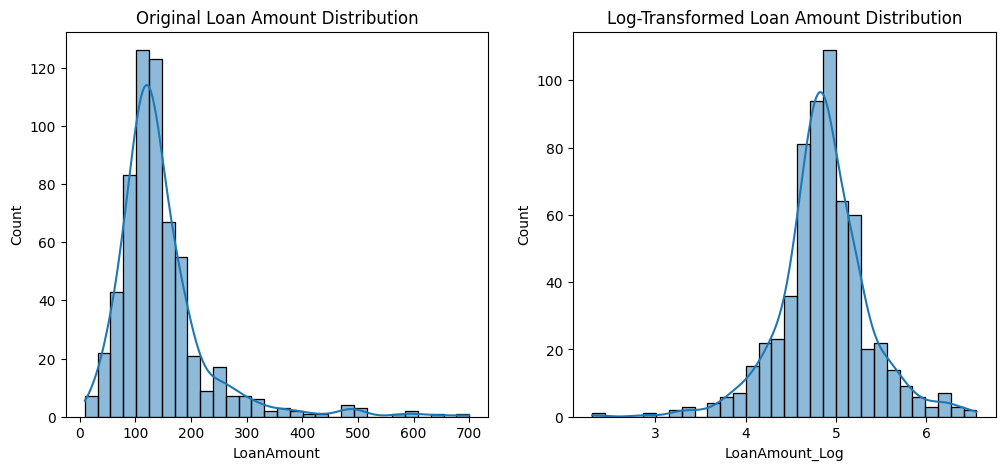

In [4]:
## A visual to show feature engineering impact on distributions
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['LoanAmount'], bins=30, ax=axes[0], kde
=True).set_title('Original Loan Amount Distribution')
sns.histplot(data['LoanAmount_Log'], bins=30, ax=axes[1], kde=True).set_title('Log-Transformed Loan Amount Distribution')
plt.show()